In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import pandas as pd
from scipy import optimize
import math
plt.rcParams["figure.figsize"] = (10,5)

[]

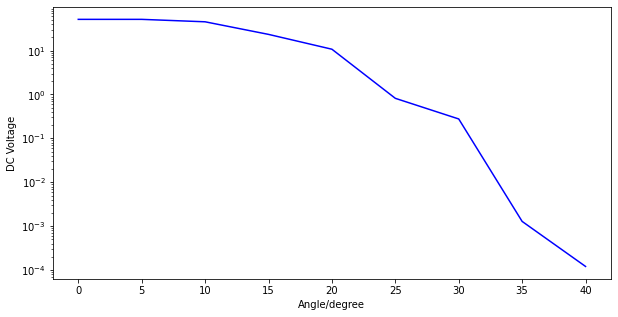

In [2]:
#prelab
vdc=np.array([5.149,5.149,4.530,2.341,1.075,81.789*10**-3,83.123/3*10**-3,1.284/10*10**-3,0.121/10*10**-3])*10
angle=np.array([0,5,10,15,20,25,30,35,40])
plt.plot(angle,vdc,"b-")
plt.xlabel("Angle/degree")
plt.ylabel("DC Voltage")
plt.semilogy()

[]

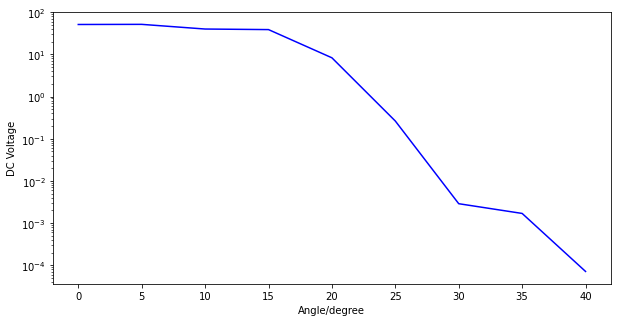

In [3]:
#prelab with background block
vdc=np.array([5.109,5.145,3.986,3.865,0.829,78.834/3*10**-3,2.881/10*10**-3,1.694/10*10**-3,0.0714/10*10**-3])*10
angle=np.array([0,5,10,15,20,25,30,35,40])
plt.plot(angle,vdc,"b-")
plt.xlabel("Angle/degree")
plt.ylabel("DC Voltage")
plt.semilogy()

[]

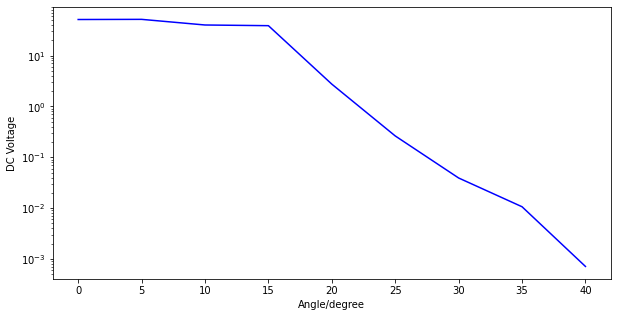

In [4]:
#prelab with background block adjust gain to 3 to aviod offset shift
vdc=np.array([5.109,5.145,3.986,3.865,0.274,78.834/3*10**-3,11.745/3*10**-3,3.195/3*10**-3,0.714/10*10**-3])*10
angle=np.array([0,5,10,15,20,25,30,35,40])
plt.plot(angle,vdc,"b-")
plt.xlabel("Angle/degree")
plt.ylabel("DC Voltage")
plt.semilogy()

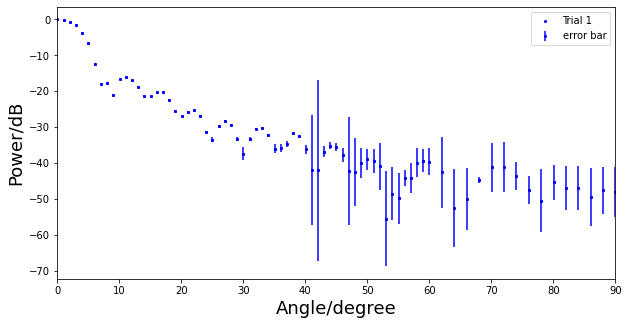

In [5]:
#4.1 Horn antenna pattern measurements
#1 degree increment from 0-60, 2 degrees increment from 60-90

file=open("Horn_antenna_pattern_measurements_data1.txt","r" )
angle=[]
power=[]
errs=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))
    errs.append(float(data[2]))
    
angle=np.array(angle)
power=np.array(power)
errs=np.array(errs)

power=power-0.000340 #noise
power=power/(5.29-0.00034)# calculate the ratio
errs=(errs-0.000340)/(5.29-0.00034)

p_errs=10 * np.log10(abs(power+errs))-10 * np.log10(abs(power))

power=10 * np.log10(abs(power))

plt.errorbar(angle, power, yerr=p_errs, markersize=2,fmt="bo",label="error bar")

plt.plot(angle,power,"bo",markersize=2,label="Trial 1")
plt.xlabel("Angle/degree",fontsize=18)
plt.ylabel("Power/dB",fontsize=18)
plt.xlim([0, 90])
plt.legend()

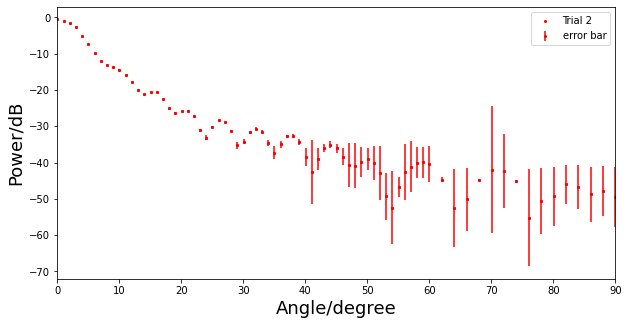

In [6]:
#4.1 Horn antenna pattern measurements
#1 degree increment from 0-60, 2 degrees increment from 60-90

file=open("Horn_antenna_pattern_measurements_data2.txt","r" )
angle=[]
power=[]
errs=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))
    errs.append(float(data[2]))
    
angle=np.array(angle)
power=np.array(power)
errs=np.array(errs)

power=power-0.000340 #noise
power=power/(5.29-0.00034)# calculate the ratio
errs=(errs-0.000340)/(5.29-0.00034)

p_errs=10 * np.log10(abs(power+errs))-10 * np.log10(abs(power))

power=10 * np.log10(abs(power))

plt.errorbar(angle, power, yerr=p_errs, markersize=2,fmt="ro",label="error bar")



plt.plot(angle,power,"ro",markersize=2,label="Trial 2")









plt.xlabel("Angle/degree",fontsize=18)
plt.ylabel("Power/dB",fontsize=18)
plt.xlim([0, 90])
plt.legend()

85.03333333333333


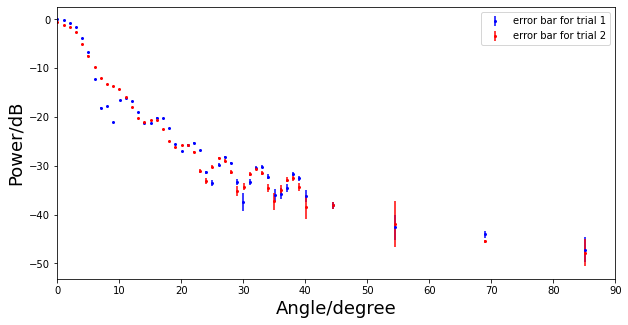

In [7]:
file=open("Horn_antenna_pattern_measurements_data1.txt","r" )
angle=[]
power=[]
errs=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))
    errs.append(float(data[2]))
    
angle=np.array(angle)
power=np.array(power)
errs=np.array(errs)



power=power-0.000340 #noise
power=power/(5.29-0.00034)# calculate the ratio
errs=(errs-0.000340)/(5.29-0.00034)

#############################
anglebin1=0
powerbin1=0
for i in range(40,50):
    anglebin1=anglebin1+angle[i]
    powerbin1=powerbin1+power[i]
anglebin1=anglebin1/10
powerbin1=powerbin1/10

anglebin2=0
powerbin2=0
for i in range(50,60):
    anglebin2=anglebin2+angle[i]
    powerbin2=powerbin2+power[i]
anglebin2=anglebin2/10
powerbin2=powerbin2/10

anglebin3=0
powerbin3=0
for i in range(60,70):
    anglebin3=anglebin3+angle[i]
    powerbin3=powerbin3+power[i]
anglebin3=anglebin3/10
powerbin3=powerbin3/10

anglebin4=0
powerbin4=0
for i in range(70,76):
    anglebin4=anglebin4+angle[i]
    powerbin4=powerbin4+power[i]
anglebin4=anglebin4/6
powerbin4=powerbin4/6


##############################
angle_nobin=angle[0:41]


p_errs=10 * np.log10(abs(power+errs))-10 * np.log10(abs(power))

power=10 * np.log10(abs(power))

p_errs_nobin=p_errs[0:41]

power_nobin=power[0:41]

power_bin=np.array([powerbin1,powerbin2,powerbin3,powerbin4])
angle_bin=np.array([anglebin1,anglebin2,anglebin3,anglebin4])

errs_bin=[np.mean(errs[41:50]),np.mean(errs[51:60]),np.mean(errs[61:70]),np.mean(errs[71:76])]

p_errs_bin=(10 * np.log10(abs(power_bin+errs_bin))-10 * np.log10(abs(power_bin)))/np.sqrt(np.array([10,10,10,6]))
power_bin=10 * np.log10(abs(power_bin))



plt.errorbar(angle_bin, power_bin, yerr=p_errs_bin, markersize=2,fmt="bo",label="error bar for trial 1")
plt.errorbar(angle_nobin, power_nobin, yerr=p_errs_nobin, markersize=2,fmt="bo")


###################################################################################


file=open("Horn_antenna_pattern_measurements_data2.txt","r" )
angle=[]
power=[]
errs=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))
    errs.append(float(data[2]))
    
angle=np.array(angle)
power=np.array(power)
errs=np.array(errs)



power=power-0.000340 #noise
power=power/(5.29-0.00034)# calculate the ratio
errs=(errs-0.000340)/(5.29-0.00034)

#############################
anglebin1=0
powerbin1=0
for i in range(40,50):
    anglebin1=anglebin1+angle[i]
    powerbin1=powerbin1+power[i]
anglebin1=anglebin1/10
powerbin1=powerbin1/10

anglebin2=0
powerbin2=0
for i in range(50,60):
    anglebin2=anglebin2+angle[i]
    powerbin2=powerbin2+power[i]
anglebin2=anglebin2/10
powerbin2=powerbin2/10

anglebin3=0
powerbin3=0
for i in range(60,70):
    anglebin3=anglebin3+angle[i]
    powerbin3=powerbin3+power[i]
anglebin3=anglebin3/10
powerbin3=powerbin3/10

anglebin4=0
powerbin4=0
for i in range(70,76):
    anglebin4=anglebin4+angle[i]
    powerbin4=powerbin4+power[i]
anglebin4=anglebin4/6
powerbin4=powerbin4/6


##############################
angle_nobin=angle[0:41]


p_errs=10 * np.log10(abs(power+errs))-10 * np.log10(abs(power))

power=10 * np.log10(abs(power))

p_errs_nobin=p_errs[0:41]

power_nobin=power[0:41]

power_bin=np.array([powerbin1,powerbin2,powerbin3,powerbin4])
angle_bin=np.array([anglebin1,anglebin2,anglebin3,anglebin4])

errs_bin=[np.mean(errs[41:50]),np.mean(errs[51:60]),np.mean(errs[61:70]),np.mean(errs[71:76])]

p_errs_bin=(10 * np.log10(abs(power_bin+errs_bin))-10 * np.log10(abs(power_bin)))/np.sqrt(np.array([10,10,10,6]))

power_bin=10 * np.log10(abs(power_bin))



plt.errorbar(angle_bin, power_bin, yerr=p_errs_bin, markersize=2,fmt="ro",label="error bar for trial 2")
plt.errorbar(angle_nobin, power_nobin, yerr=p_errs_nobin, markersize=2,fmt="ro")


























plt.xlabel("Angle/degree",fontsize=18)
plt.ylabel("Power/dB",fontsize=18)
plt.xlim([0, 90])
plt.legend()
print(anglebin4)

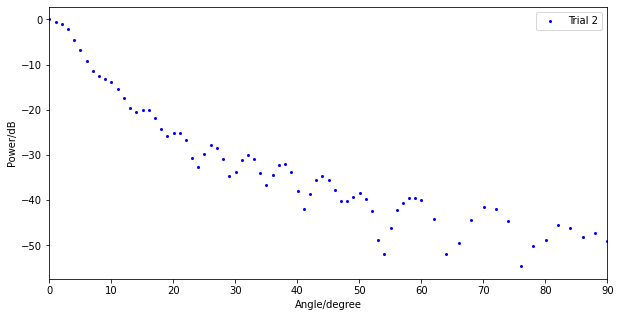

In [8]:
#2 degree increment from 0-60, 2 degrees increment from 60-90

file=open("Horn_antenna_pattern_measurements_data2.txt","r" )
angle=[]
power=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))

angle=np.array(angle)
power=np.array(power)
power=power-0.000340 #noise
power=power/(4.66-0.00034)# calculate the ratio

power=10 * np.log10(abs(power))
plt.plot(angle,power,"bo",markersize=2,label="Trial 2")
plt.xlabel("Angle/degree")
plt.ylabel("Power/dB")
plt.xlim([0, 90])
plt.legend()

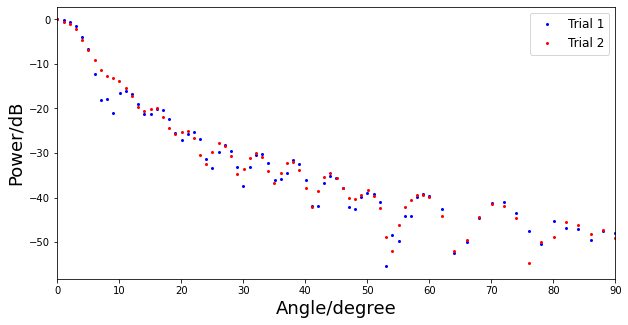

In [9]:
#4.1 Horn antenna pattern measurements
#1 degree increment from 0-60, 2 degrees increment from 60-90

file=open("Horn_antenna_pattern_measurements_data1.txt","r" )
angle=[]
power=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))

angle=np.array(angle)
power=np.array(power)
power=power-0.000340 #noise
power=power/(5.29-0.00034)# calculate the ratio

power=10 * np.log10(abs(power))
plt.plot(angle,power,"bo",markersize=2,label="Trial 1")



#2 degree increment from 0-60, 2 degrees increment from 60-90

file=open("Horn_antenna_pattern_measurements_data2.txt","r" )
angle=[]
power=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split()
    angle.append(float(data[0]))
    power.append(float(data[1]))

angle=np.array(angle)
power=np.array(power)
power=power-0.000340 #noise
power=power/(4.66-0.00034)# calculate the ratio

power=10 * np.log10(abs(power))
plt.plot(angle,power,"ro",markersize=2,label="Trial 2")



plt.xlabel("Angle/degree",fontsize=18)
plt.ylabel("Power/dB",fontsize=18)
plt.xlim([0, 90])
plt.legend()
plt.legend(fontsize=12)

In [10]:
def my_pobs(g,tobs,trec):
    return g*(tobs+trec)

def my_trec(tw,tc,pw,pc):
    return (tw*pc-tc*pw)/(pw-pc)

def my_tobs(pobs,g,trec):
    return (pobs/g-trec)

def my_gain(pw,pc,tw,tc):
    return (pw-pc)/(tw-tc)

-0.010390765231716358
3.9442964127066116


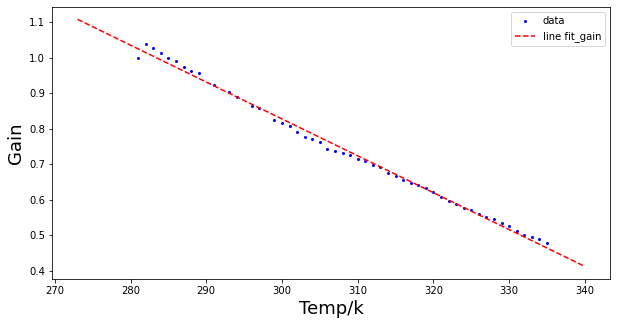

In [11]:
file=open("LNB_gain_temp.txt","r" )
temp=[]
power=[]
file=file.readlines()
for line in file:
    data=line.split()
    temp.append(float(data[0]))
    power.append(float(data[1]))
temp=np.array(temp)
temp=temp+273

power=np.array(power)
power=power/34.7
plt.plot(temp,power,"bo",markersize=2,label="data")
plt.xlabel("Temp/k",fontsize=18)
plt.ylabel("Gain",fontsize=18)
#plt.xlim([0, 90])

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, temp, power, p0=[guess_a, guess_b],absolute_sigma=True)


fit_a=par[0]
fit_b=par[1]

xf=np.linspace(273,340,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_gain")
print(fit_a)
print(fit_b)

plt.legend()

4.1958387987083805
-0.0791067647241674
2.698169116217537
0.35459243983539174
3.673794031869974


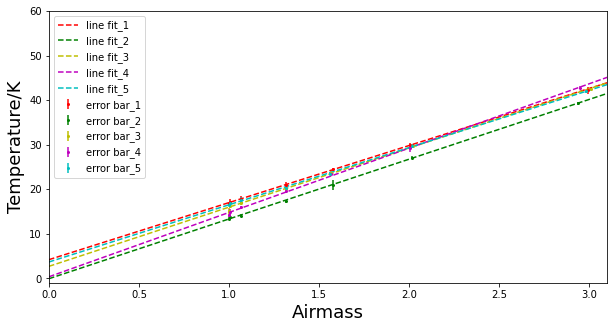

In [12]:

#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")

print(fit_b)


#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

print(fit_b)

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")



print(fit_b)

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")



print(fit_b)


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")



print(fit_b)

plt.xlim([0,3.1])
plt.ylim([-1,60])

plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

4.1958387987083805
12.801514855754377
3.3212579576873873
12.839823837296521
1.992247692565151
0.19047377832124524


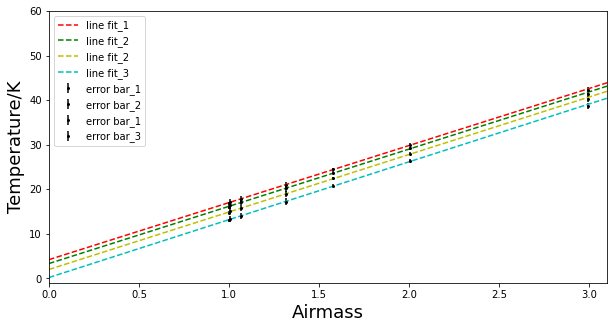

In [13]:
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ko",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")

print(fit_b)
print(fit_a)




#######################################################Trial 1
tc=77.55-1
tw=296.45
pw=1.28*10**-6
pc=648*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ko",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

print(fit_b)
print(fit_a)



#######################################################Trial 1
tc=77.553-2
tw=296.45
pw=1.28*10**-6
pc=648*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ko",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_2")

plt.xlabel("Airmass")
plt.ylabel("Temperature/K")

print(fit_b)


#######################################################Trial 1
tc=77.553-3
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ko",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_3")

print(fit_b)

plt.xlim([0,3.1])
plt.ylim([-1,60])

plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()



In [14]:
#CMB measurement
file=open("tmp.txt","r" )
angle=[]
power=[]
file=file.readlines()
file = file[1:]
for line in file:
    data=line.split(",")
    angle.append(float(data[3]))
angle=np.array(angle)
angle=((angle-2.5)*15-18.105)
print(angle)
print(np.min(angle))

[-9.75831233e+00 -9.75831233e+00 -9.75831233e+00 -9.75831233e+00
 -9.75831233e+00 -9.83458005e+00 -9.75831233e+00 -9.83458005e+00
 -9.75831233e+00 -9.75831233e+00 -9.75831233e+00 -9.75831233e+00
 -9.83458005e+00 -9.83458005e+00 -9.83458005e+00 -9.83458005e+00
 -9.83458005e+00 -9.83458005e+00 -9.75831233e+00 -9.83458005e+00
 -9.75831233e+00 -9.83458005e+00 -9.83458005e+00 -9.75831233e+00
 -9.75831233e+00 -9.83458005e+00 -9.75831233e+00 -9.83458005e+00
 -9.75831233e+00 -9.75831233e+00 -9.75831233e+00 -9.75831233e+00
 -9.83458005e+00 -9.75831233e+00 -9.83458005e+00 -9.83458005e+00
 -9.83458005e+00 -9.75831233e+00 -9.91084777e+00 -9.37697374e+00
 -1.01396509e+01 -9.68204461e+00 -9.83458005e+00 -9.91084777e+00
 -9.83458005e+00 -9.91084777e+00 -9.83458005e+00 -9.98711549e+00
 -9.91084777e+00 -1.01396509e+01 -9.83458005e+00 -9.91084777e+00
 -9.98711549e+00 -1.03684541e+01 -1.02921864e+01 -1.02159186e+01
 -1.02159186e+01 -1.02159186e+01 -1.02921864e+01 -1.02159186e+01
 -1.02159186e+01 -1.02159

-0.010390765231716358
3.9442964127066116


NameError: name 'chi_square' is not defined

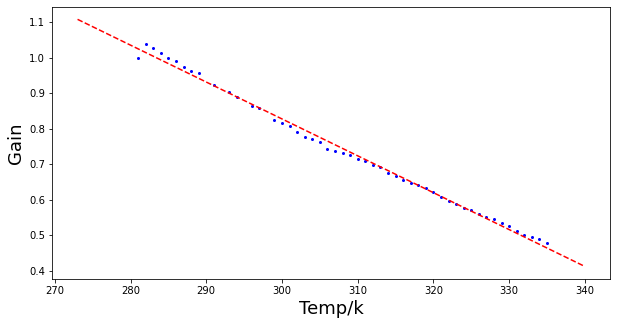

In [15]:
file=open("LNB_gain_temp.txt","r" )
temp=[]
power=[]
file=file.readlines()
for line in file:
    data=line.split()
    temp.append(float(data[0]))
    power.append(float(data[1]))
temp=np.array(temp)
temp=temp+273

power=np.array(power)
power=power/34.7
plt.plot(temp,power,"bo",markersize=2,label="gain vs temperature")
plt.xlabel("Temp/k",fontsize=18)
plt.ylabel("Gain",fontsize=18)
#plt.xlim([0, 90])

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, temp, power, p0=[guess_a, guess_b],absolute_sigma=True)


fit_a=par[0]
fit_b=par[1]

xf=np.linspace(273,340,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_gain")
print(fit_a)
print(fit_b)


    
print(chi_square)
plt.legend()

3.564134958127888
-0.22088424611432317
2.2997156478380285
2.2833841383712614
1.8967521625912702
[ 3.56413496 -0.22088425  2.29971565  2.28338414  1.89675216]
1.9646205321628247
1.2290958159169916


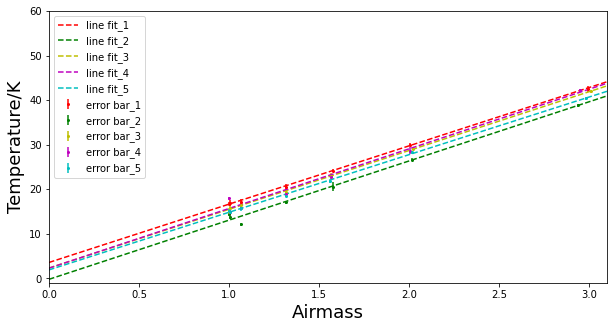

In [16]:
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")

print(fit_b)

fit_b1=fit_b

#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

print(fit_b)

fit_b2=fit_b

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")



print(fit_b)

fit_b3=fit_b

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")



print(fit_b)

fit_b4=fit_b


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")



print(fit_b)

fit_b5=fit_b


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
print(cmb)
print(np.mean(cmb))
print(np.std(cmb))

[3.56413496 2.29971565 2.28338414 1.89675216]
[0.52283471 0.37276942 0.37793345 0.35496406]
[13.08232811 13.19227546 13.38479871 12.92823385]
[0.31942407 0.20659026 0.21886028 0.20149461]
13.143470940428353
0.9463692185323164
2.614036808596688
1.6285016375113335


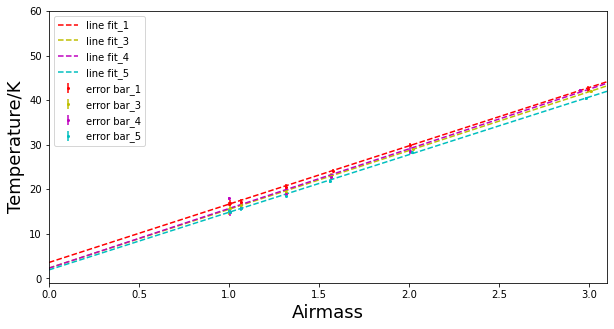

In [17]:
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

""""
#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

print(fit_b)

fit_b2=fit_b

"""

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a1)/np.sum(slope_unc))+fit_a3*((unc_a3)/np.sum(slope_unc))+fit_a4*((unc_a4)/np.sum(slope_unc))+fit_a5*((unc_a5)/np.sum(slope_unc))
slope_err=np.sum(slope_unc)
cmb_avg=fit_b1*((unc_b1)/np.sum(cmb_unc))+fit_b3*((unc_b3)/np.sum(cmb_unc))+fit_b4*((unc_b4)/np.sum(cmb_unc))+fit_b5*((unc_b5)/np.sum(cmb_unc))
cmb_err=np.sum(cmb_unc)

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)

print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

3.564134958127888
-0.22088424611432317
2.2997156478380285
2.2833841383712614
1.8967521625912702
[ 3.56413496 -0.22088425  2.29971565  2.28338414  1.89675216]
1.9646205321628247
1.2290958159169916


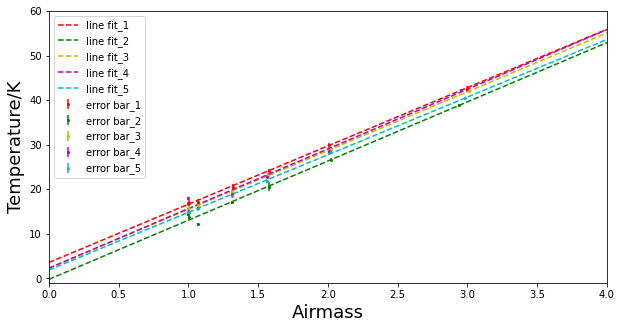

In [18]:
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")

print(fit_b)

fit_b1=fit_b

#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

print(fit_b)

fit_b2=fit_b

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")



print(fit_b)

fit_b3=fit_b

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")



print(fit_b)

fit_b4=fit_b


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*tlnb+3.9442964127066116)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")



print(fit_b)

fit_b5=fit_b


plt.xlim([0,4])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
print(cmb)
print(np.mean(cmb))
print(np.std(cmb))

[ 3.70038093 -0.07920251  2.4405737   2.42776209  2.03290933]
[0.5233077  0.35496406 0.37310591 0.37827674 0.35528237]
[13.09442395 13.29097315 13.20414222 13.39597891 12.94001737]
[0.31971325 0.20149461 0.20677673 0.21905843 0.20167543]
10.549297568250427
0.523672440798604
1.655146564746102
0.8990980475142927
0.7959405029429962
42.49783844501851
1.7018502340553485
57.994814428707095
3.640954038368885
[ 0.1591881   8.49956769  0.34037005 11.59896289  0.72819081]


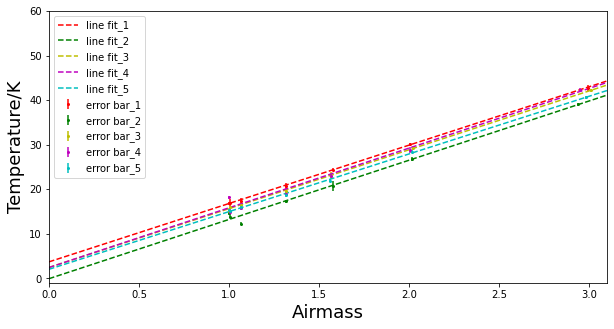

In [19]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b2,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a2,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a2,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a2+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a2*((unc_a1+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((unc_a2+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((unc_a2+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((unc_a2+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/5
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b2+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b2*((unc_b1+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b2+unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b2+unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b2+unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/5
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square2,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)


In [20]:
#
x=np.linspace(0.0,6.0,100)
y=13.167*x+2.107
plt.plot(xf,yf,"r--",label="average line fit")
plt.xlim([0,4])
plt.ylim([-1,60])
plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

print("CMB temperature= ","2.107", "+-", "1.983")


""""
3.56413496 +- 0.52283471
-0.22088425 +-0.35496406
2.29971565  +- 0.37276942
2.28338414  +-0.37793345
1.89675216 +- 0.35496406
""""




""""
3.564 +- 0.523
-0.221 +-0.355
2.230  +- 0.373
2.283  +-0.378
1.897 +- 0.355
""""

"1.655+-0.899"

SyntaxError: EOL while scanning string literal (467390903.py, line 20)

[3.70038093 2.4405737  2.42776209 2.03290933]
[0.5233077  0.37310591 0.37827674 0.35528237]
[13.09442395 13.20414222 13.39597891 12.94001737]
[0.31971325 0.20677673 0.21905843 0.20167543]
9.869830898553866
0.483355716523639
1.9621046435496317
0.8260616310397113
0.7959405029429962
42.49783844501851
1.7018502340553485
57.994814428707095
3.640954038368885
[ 0.1591881   0.34037005 11.59896289  0.72819081]


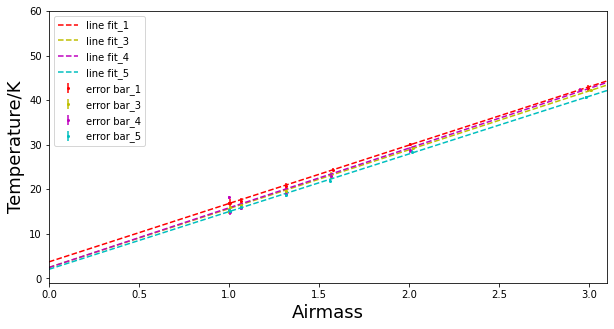

In [21]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2
"""
tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2
    
"""

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/4
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/4
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)



[3.70038093 3.78447718 5.11521156 4.72329515]
[0.5233077  0.37139774 0.37481482 0.35203428]
[13.09442395 13.14369005 13.2733815  12.82171512]
[0.31971325 0.20583005 0.21705364 0.19983165]
9.811158854710461
0.48127699227077786
3.263654927270248
0.8223147280028614
0.7959405029429962
42.49783844501851
1.7018502340552222
57.99481442870956
3.640954038369177
[ 0.1591881   0.34037005 11.59896289  0.72819081]


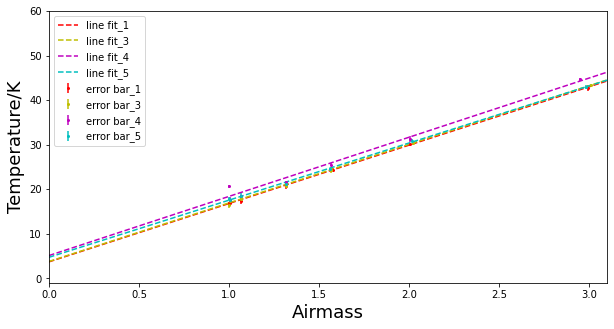

In [22]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2
"""
tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2
    
"""

#######################################################Trial 3

tc=77.557+1
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544+2
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548+2
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/4
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/4
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)




[2.88263430e-09 2.88592910e-09 2.89281824e-09 2.88802580e-09
 2.88473099e-09 2.88113666e-09 2.87454705e-09]
[3.70038093 1.27361013 3.78447718 4.44334952 4.05069867]
[0.5233077  0.3528463  0.37139774 0.37568031 0.3528463 ]
[13.09442395 13.23056427 13.14369005 13.30403068 12.85129069]
[0.31971325 0.2002926  0.20583005 0.21755485 0.2002926 ]
10.499914963746658
0.5216770386708312
2.7531700366939686
0.8955020708572837
0.7959405029429962
42.497838444946915
1.7018502340552222
57.99481442870705
3.640954038369028
[ 0.1591881   8.49956769  0.34037005 11.59896289  0.72819081]


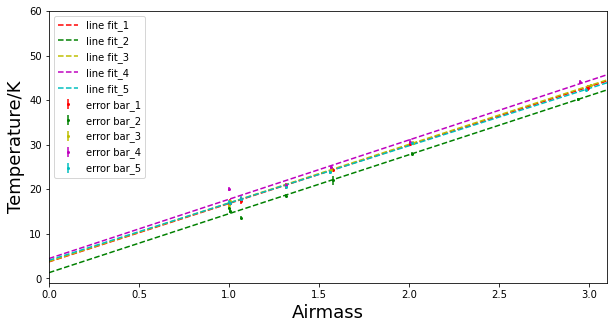

In [63]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
print(g)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2

tc=77.547+1
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 3

tc=77.557+1
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544+1.5
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548+1.5
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b2,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a2,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a2,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a2+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a2*((unc_a1+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((unc_a2+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((unc_a2+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((unc_a2+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/5
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b2+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b2*((unc_b1+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b2+unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b2+unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b2+unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/5
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square2,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)



In [24]:
fit_b1=3.70038093 - 3.70038093
fit_b2=1.27361013 +0.07920251 
fit_b3=3.78447718 - 2.4405737
fit_b4=5.11521156 - 2.42776209
fit_b5=4.72329515 - 2.03290933



unc_b1=0.5233077  
unc_b2=0.35528237
unc_b3=0.37139774
unc_b4=0.37481482
unc_b5=0.35203428

cmb_unc=np.array([unc_b1,unc_b2,unc_b3,unc_b4,unc_b5])


cmb_avg=fit_b1*((unc_b2+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b2*((unc_b1+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b2+unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b2+unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b2+unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/5
cmb_err=np.sqrt(np.sum(cmb_unc**2))
print(cmb_avg)

1.318056545029018


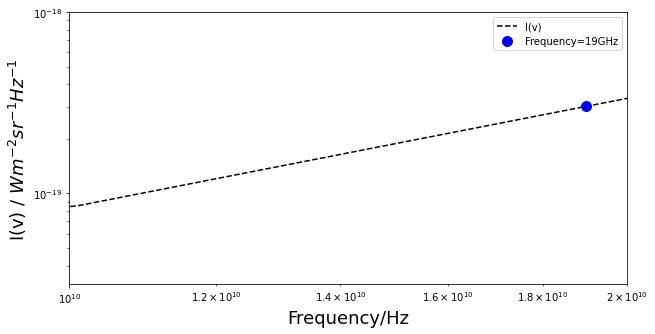

In [8]:

xf=np.linspace(0.0,10*10**11,100)
yf=2*1.38*10**-23*xf**2/(3*10**8)**2*2.73
plt.plot(xf,yf,"k--",label="I(v)")
plt.plot(19*10**9,2*1.38*10**-23*(19*10**9)**2/(3*10**8)**2*2.73,'bo',markersize=10,label="Frequency=19GHz")
plt.semilogy()
plt.semilogx()
plt.xlabel("Frequency/Hz",fontsize=18)
plt.ylabel("I(v) / $W m^{-2} sr^{-1} Hz^{-1}$ ",fontsize=18)


plt.xlim([10**10,20*10**9])
plt.ylim([10**-19.5,10*10**-19])
plt.legend()

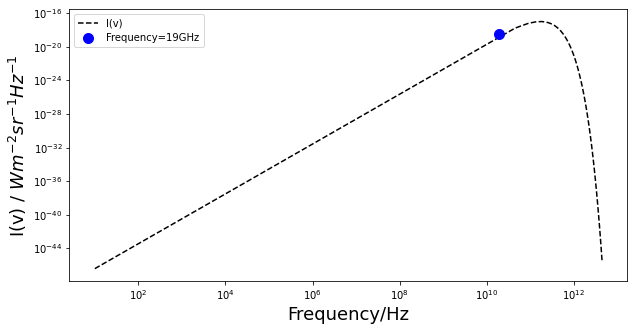

In [9]:
xf=np.linspace(10.0,10*10**11.65,100)
yf=((2*6.62607015*10**-34*xf**3)/(3*10**8)**2)*1/(np.exp((6.62607015*10**-34*xf)/(1.38*10**-23*2.73)-1))
plt.plot(xf,yf,"k--",label="I(v)")
plt.plot(19*10**9,2*1.38*10**-23*(19*10**9)**2/(3*10**8)**2*2.73,'bo',markersize=10,label="Frequency=19GHz")
plt.semilogy()
plt.semilogx()
plt.xlabel("Frequency/Hz",fontsize=18)
plt.ylabel("I(v) / $W m^{-2} sr^{-1} Hz^{-1}$ ",fontsize=18)




#plt.xlim([10**10,20*10**9])
#plt.ylim([10**-19.5,10*10**-19])
plt.legend()

2.8826342983229555e-09
[ 4.1958388  -0.07910676  2.69816912  0.35459244  3.67379403]
[0.52310886 0.35827378 0.37375573 0.37660077 0.35827378]
[12.80151486 13.40526942 13.27487463 14.4308363  12.83601156]
[0.31936759 0.20323164 0.20715773 0.21881299 0.20323164]
10.687941728187187
0.5247811958452022
1.7038606824993736
0.9010463753452278
0.761277822741985
1.4328545387706337
1.9884596042882536
5.988313633880211
1.8749987218324644
[0.15225556 0.28657091 0.39769192 1.19766273 0.37499974]


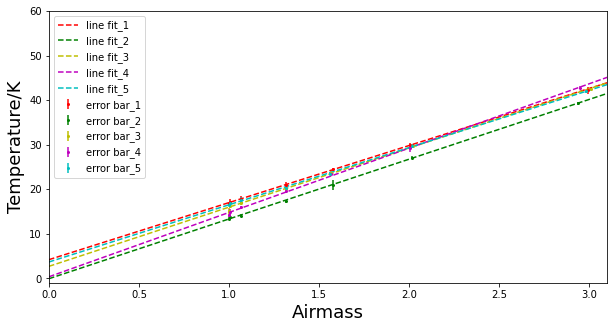

In [54]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

print(g)
t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b2,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a2,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a2,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a2+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a2*((unc_a1+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((unc_a2+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((unc_a2+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((unc_a2+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/5
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b2+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b2*((unc_b1+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b2+unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b2+unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b2+unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/5
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square2,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)




[ 3.70038093 -0.07920251  2.4405737   2.42776209  4.05069867]
[0.5233077  0.35203428 0.37310591 0.37827674 0.3528463 ]
[13.09442395 13.29097315 13.20414222 13.39597891 12.85129069]
[0.31971325 0.19983165 0.20677673 0.21905843 0.2002926 ]
10.534629357570406
0.5225031906923264
1.986031650842189
0.8969843398509839
0.7959405029429962
42.49783844501851
1.7018502340553485
57.994814428707095
3.640954038369028
[ 0.1591881   8.49956769  0.34037005 11.59896289  0.72819081]


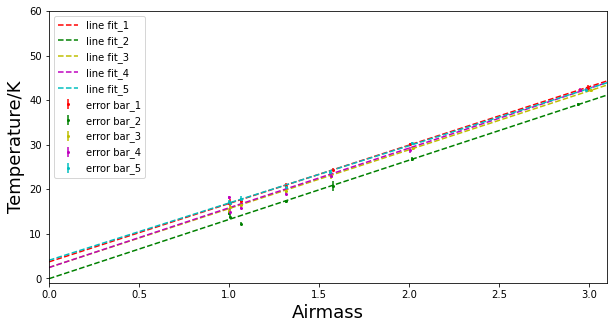

In [57]:
##correct shift
#######################################################Trial 1
tc=77.553
tw=296.45
pw=1.28*10**-6
pc=649*10**-9

angle=np.array([0,5.5,20.5,40.6,50.7,60.1,70.5])
pobs=np.array([474,475,477,486,496,512,547])*10**-9
tlnb=np.array([283.27,283.16,282.93,283.09,283.20,283.32,283.54])
errs=np.array([1,2,2,2,1,1,2])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)


t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)

#plt.plot(airmass,tobs,"bo",markersize=5,label="Trial 1")

def line_func(x,a,b):
    return x*a+b

guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc1=np.sqrt(np.diag(cov))
unc_a1=unc1[0]
unc_b1=unc1[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2, fmt="ro",label="error bar_1")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"r--",label="line fit_1")


fit_a1=fit_a
fit_b1=fit_b

chi_square1=0
for i in range(len(airmass)):
    chi_square1=chi_square1+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 2

tc=77.547
tw=297.57
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.4,5.7,20.4,40.5,50.6,60.3,70.1])
pobs=np.array([472,473,474,483,493,510,544])*10**-9
tlnb=np.array([283.96,283.35,282.26,283.24,283.17,283.12,283.14])
errs=np.array([1,1,1,1,3,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc2=np.sqrt(np.diag(cov))
unc_a2=unc5[0]
unc_b2=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs,markersize=2,fmt="go",label="error bar_2")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"g--",label="line fit_2")

fit_a2=fit_a
fit_b2=fit_b

chi_square2=0
for i in range(len(airmass)):
    chi_square2=chi_square2+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 3

tc=77.557
tw=295.98
pw=1.26*10**-6
pc=648*10**-9


angle=np.array([0.8,5.1,20.4,40.5,50.4,60.4,70.6])
pobs=np.array([473,476,478,487,497,514,550])*10**-9
tlnb=np.array([283.29,283.16,283.09,282.97,282.94,283.02,283.08])
errs=np.array([2,1,1,1,2,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc3=np.sqrt(np.diag(cov))
unc_a3=unc3[0]
unc_b3=unc3[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="yo",label="error bar_3")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"y--",label="line fit_3")





fit_a3=fit_a
fit_b3=fit_b

chi_square3=0
for i in range(len(airmass)):
    chi_square3=chi_square3+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2

#######################################################Trial 4

tc=77.544
tw=296.08
pw=1.26*10**-6
pc=650*10**-9


angle=np.array([0.5,5.5,20.4,40.5,50.3,60.1,70.2])
pobs=np.array([473,475,478,488,499,515,553])*10**-9
tlnb=np.array([285.50,283.34,283.25,283.01,283.03,283.09,283.05])
errs=np.array([1,2,1,1,1,2,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)

t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc4=np.sqrt(np.diag(cov))
unc_a4=unc4[0]
unc_b4=unc4[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="mo",label="error bar_4")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"m--",label="line fit_4")





fit_a4=fit_a
fit_b4=fit_b

chi_square4=0
for i in range(len(airmass)):
    chi_square4=chi_square4+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


#######################################################Trial 5

tc=77.548+1.5
tw=296.31
pw=1.28*10**-6
pc=653*10**-9


angle=np.array([0.0,5.5,20.2,40.5,50.2,60.3,70.4])
pobs=np.array([478,479,481,489,498,516,551])*10**-9
tlnb=np.array([282.58,282.25,282.34,282.32,282.42,282.56,282.59])
errs=np.array([1,1,2,1,1,1,1])*10**-9

trec=my_trec(tw,tc,pw,pc)
g=my_gain(pw,pc,tw,tc)
g=(-0.010390765231716358*(tlnb-283.27)+1)*g
tobs=my_tobs(pobs,g,trec)
airmass=1/np.cos(angle*math.pi/180.0)



t_errs=my_tobs(pobs+errs,g,trec)-my_tobs(pobs,g,trec)


guess_a=1.0
guess_b=0.0
par, cov = optimize.curve_fit(line_func, airmass, tobs, p0=[guess_a, guess_b],sigma=t_errs,absolute_sigma=True)

unc5=np.sqrt(np.diag(cov))
unc_a5=unc5[0]
unc_b5=unc5[1]

plt.errorbar(airmass, tobs, yerr=t_errs, markersize=2,fmt="co",label="error bar_5")

fit_a=par[0]
fit_b=par[1]

xf=np.linspace(0.0,6.0,100)
yf=fit_b+fit_a*xf

plt.plot(xf,yf,"c--",label="line fit_5")




fit_a5=fit_a
fit_b5=fit_b

chi_square5=0
for i in range(len(airmass)):
    chi_square5=chi_square5+(fit_a*airmass[i]+fit_b-tobs[i])**2/t_errs[i]**2


plt.xlim([0,3.1])
plt.ylim([-1,60])




plt.xlabel("Airmass",fontsize=18)
plt.ylabel("Temperature/K",fontsize=18)
plt.legend()

cmb=np.array([fit_b1,fit_b2,fit_b3,fit_b4,fit_b5])
cmb_unc=np.array([unc_b1,unc_b2,unc_b3,unc_b4,unc_b5])

slope=np.array([fit_a1,fit_a2,fit_a3,fit_a4,fit_a5])
slope_unc=np.array([unc_a1,unc_a2,unc_a3,unc_a4,unc_a5])


slope_avg=fit_a1*((unc_a2+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a2*((unc_a1+unc_a3+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a3*((unc_a2+unc_a1+unc_a4+unc_a5)/np.sum(slope_unc))+fit_a4*((unc_a2+unc_a3+unc_a1+unc_a5)/np.sum(slope_unc))+fit_a5*((unc_a2+unc_a3+unc_a4+unc_a1)/np.sum(slope_unc))
slope_avg=slope_avg/5
slope_err=np.sqrt(np.sum(slope_unc**2))

cmb_avg=fit_b1*((unc_b2+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b2*((unc_b1+unc_b3+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b3*((unc_b2+unc_b1+unc_b4+unc_b5)/np.sum(cmb_unc))+fit_b4*((unc_b2+unc_b3+unc_b1+unc_b5)/np.sum(cmb_unc))+fit_b5*((unc_b2+unc_b3+unc_b4+unc_b1)/np.sum(cmb_unc))
cmb_avg=cmb_avg/5
cmb_err=np.sqrt(np.sum(cmb_unc**2))

reduced_chi_square=np.array([chi_square1,chi_square2,chi_square3,chi_square4,chi_square5])/5

print(cmb)
print(cmb_unc)
print(slope)
print(slope_unc)


print(slope_avg)
print(slope_err)
print(cmb_avg)
print(cmb_err)

print(chi_square1)
print(chi_square2)
print(chi_square3)
print(chi_square4)
print(chi_square5)
print(reduced_chi_square)

